In [1]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
data_filepath = "heart_failure_clinical_records_dataset.csv"
raw_data = pd.read_csv(data_filepath)

Text(0, 0.5, 'Ejection Fraction')

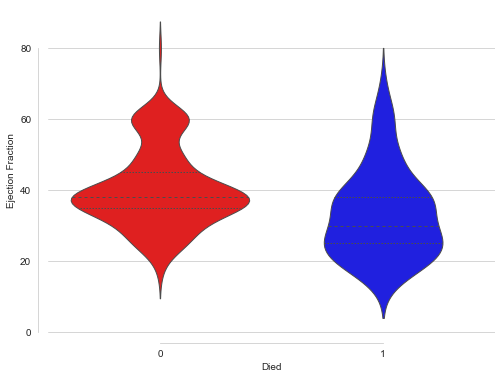

In [3]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="DEATH_EVENT", y="ejection_fraction", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"})
sns.despine(offset=10, trim=True)
plt.xlabel("Died")
plt.ylabel("Ejection Fraction")

To see the 'distribution' in the above graph we look at the density of points at different values of ejection_fraction for those who died and those who didn't.<br>
<br>
As illustrated in the chart there is a large majority that did have an ejection_fraction around the age of 40. Ther eis also another peak around 60 which could be a point of investigation later in the analysis. <br>
<br>
For the rest of the survivors we can see that the distribution of ejection_fraction my be more spread out but the meidan is lower.

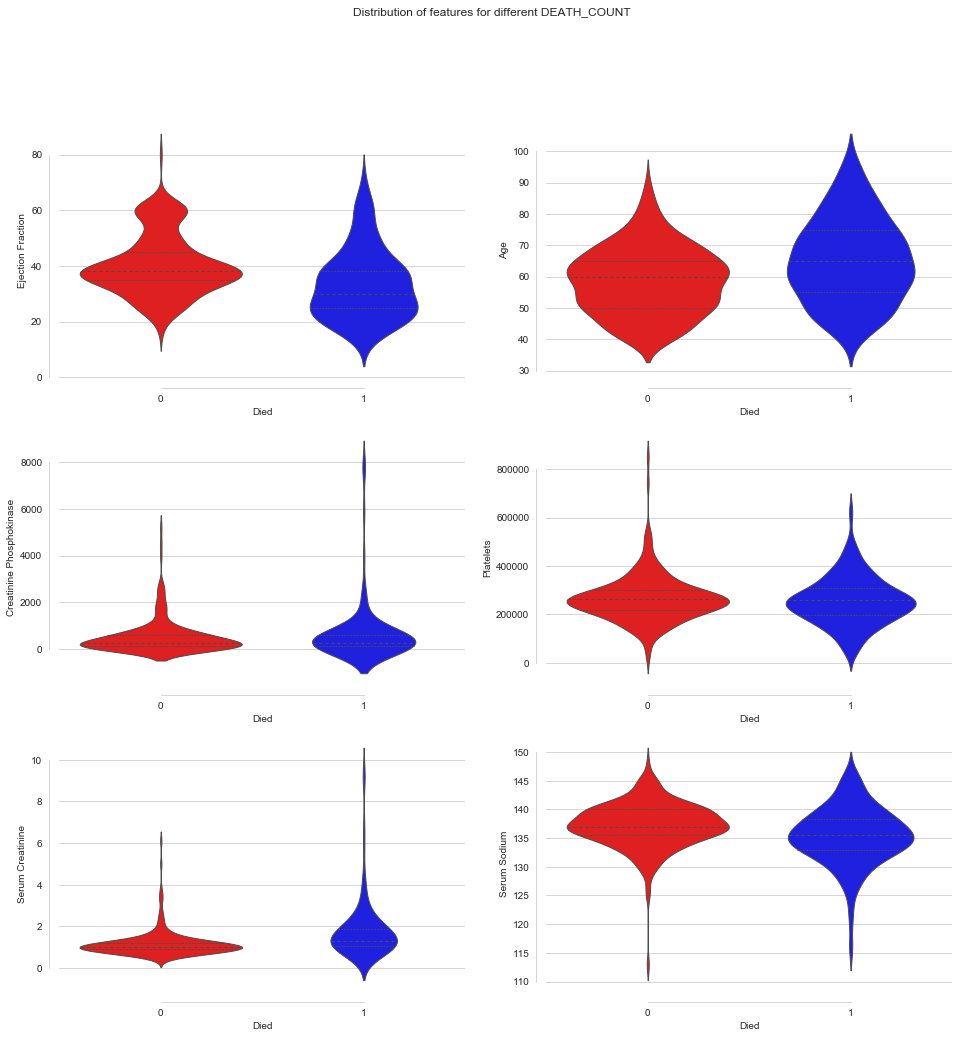

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle('Distribution of features for different DEATH_COUNT');

_ = sns.violinplot(x="DEATH_EVENT", y="ejection_fraction", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"}, ax=axes[0, 0]);
plt.setp(axes[0, 0], ylabel="Ejection Fraction");

_ = sns.violinplot(x="DEATH_EVENT", y="age", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"}, ax=axes[0, 1]);
plt.setp(axes[0, 1], ylabel="Age");

_ = sns.violinplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"}, ax=axes[1, 0]);
plt.setp(axes[1, 0], ylabel="Creatinine Phosphokinase");

_ = sns.violinplot(x="DEATH_EVENT", y="platelets", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"}, ax=axes[1, 1]);
plt.setp(axes[1, 1], ylabel="Platelets");

_ = sns.violinplot(x="DEATH_EVENT", y="serum_creatinine", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"}, ax=axes[2, 0]);
plt.setp(axes[2, 0], ylabel="Serum Creatinine");

_ = sns.violinplot(x="DEATH_EVENT", y="serum_sodium", data=raw_data, split=True, inner="quart", linewidth=1, 
               palette={0: "red", 1: "blue"}, ax=axes[2, 1]);
plt.setp(axes[2, 1], ylabel="Serum Sodium");

sns.despine(offset=10, trim=True);
plt.setp(axes, xlabel="Died");

There appears to be a certain number of patients that do survive with specific characteristics with little variation while we have to also take into consideration that 2/3 of the patients did survive a single ejection_fraction. Our further analysis will look at the specifics of those that are more likely to die and those individual or identifying characteristics of those that could've died or survived. 

In [5]:
import matplotlib.patches as mpatches

def get_cat_percent_matrix(feature, mode):
    """
    'mode' can be 'individual', 'in_column' or 'column'
    """
    total_amount = len(raw_data)
    
    feature_died_amount = sum((raw_data[feature]==1) & (raw_data["DEATH_EVENT"]==1))
    not_feature_died_amount = sum((raw_data[feature]==0) & (raw_data["DEATH_EVENT"]==1))
    feature_lived_amount = sum((raw_data[feature]==1) & (raw_data["DEATH_EVENT"]==0))
    not_feature_lived_amount = sum((raw_data[feature]==0) & (raw_data["DEATH_EVENT"]==0))
    
    feature_amount = feature_died_amount+feature_lived_amount
    not_feature_amount = not_feature_died_amount+not_feature_lived_amount
    if mode=="individual":
        feature_died_percent = str(round(feature_died_amount*100/(total_amount), 2))+"%"
        not_feature_died_percent = str(round(not_feature_died_amount*100/(total_amount), 2))+"%"
        feature_lived_percent = str(round(feature_lived_amount*100/(total_amount), 2))+"%"
        not_feature_lived_percent = str(round(not_feature_lived_amount*100/(total_amount), 2))+"%"
        return feature_died_percent, not_feature_died_percent, feature_lived_percent, not_feature_lived_percent
    elif mode=="in_column":
        feature_died_percent = str(round(feature_died_amount*100/(feature_amount), 2))+"%"
        not_feature_died_percent = str(round(not_feature_died_amount*100/(not_feature_amount), 2))+"%"
        feature_lived_percent = str(round(feature_lived_amount*100/(feature_amount), 2))+"%"
        not_feature_lived_percent = str(round(not_feature_lived_amount*100/(not_feature_amount), 2))+"%"
        return feature_died_percent, not_feature_died_percent, feature_lived_percent, not_feature_lived_percent
    elif mode=="column":
        feature_percent = str(round((feature_amount)*100/(total_amount), 2))+"%"
        not_feature_percent = str(round((not_feature_amount)*100/(total_amount), 2))+"%"
        return feature_percent, not_feature_percent

def make_count_plot(x, ax, x_label):
    _=sns.histplot(binwidth=0.5, x=x, hue="DEATH_EVENT", data=raw_data, palette={0: "red", 1: "blue", 2: "darkturquoise", 3:"teal"}, ax=ax, stat="count", multiple="stack")
    sns.despine(left=True, ax=ax)
    ax.set_xticks([0, 1])
    ax.set_xlabel(x_label)
    
    feature_died_amount = sum((raw_data[x]==1) & (raw_data["DEATH_EVENT"]==1))
    not_feature_died_amount = sum((raw_data[x]==0) & (raw_data["DEATH_EVENT"]==1))
    feature_lived_amount = sum((raw_data[x]==1) & (raw_data["DEATH_EVENT"]==0))
    not_feature_lived_amount = sum((raw_data[x]==0) & (raw_data["DEATH_EVENT"]==0))
    feature_amount = feature_died_amount+feature_lived_amount
    not_feature_amount = not_feature_died_amount+not_feature_lived_amount
    
    feature_died_percent, not_feature_died_percent, feature_lived_percent, not_feature_lived_percent = get_cat_percent_matrix(x, "in_column")
    ax.text(0.2, not_feature_died_amount/2, not_feature_died_percent, style='normal', fontsize=12, fontweight="bold")
    ax.text(0.7, feature_died_amount/2, feature_died_percent, style='normal', fontsize=12, fontweight="bold")
    ax.text(0.7, (feature_lived_amount/2)+feature_died_amount, feature_lived_percent, style='normal', fontsize=12, fontweight="bold")
    ax.text(0.2, (not_feature_lived_amount/2)+not_feature_died_amount, not_feature_lived_percent, style='normal', fontsize=12, fontweight="bold")
    feature_died_percent, not_feature_died_percent, feature_lived_percent, not_feature_lived_percent = get_cat_percent_matrix(x, "individual")
    ax.text(0.2, (not_feature_died_amount/2)-9, not_feature_died_percent, style='normal', fontsize=12, color="white")
    ax.text(0.7, (feature_died_amount/2)-9, feature_died_percent, style='normal', fontsize=12, color="white")
    ax.text(0.7, ((feature_lived_amount/2)+feature_died_amount)-9, feature_lived_percent, style='normal', fontsize=12, color="white")
    ax.text(0.2, ((not_feature_lived_amount/2)+not_feature_died_amount)-9, not_feature_lived_percent, style='normal', fontsize=12, color="white")
    feature_percent, not_feature_percent = get_cat_percent_matrix(x, "column")
    ax.text(0.2, not_feature_amount+2, not_feature_percent, style='normal', fontsize=12)
    ax.text(0.7, feature_amount+2, feature_percent, style='normal', fontsize=12)

    survived_patch = mpatches.Patch(color='blue', label='Survived')
    died_patch = mpatches.Patch(color='red', label='Died')
    ax.legend(handles=[survived_patch, died_patch])

Text(0.5, 0, 'Died')

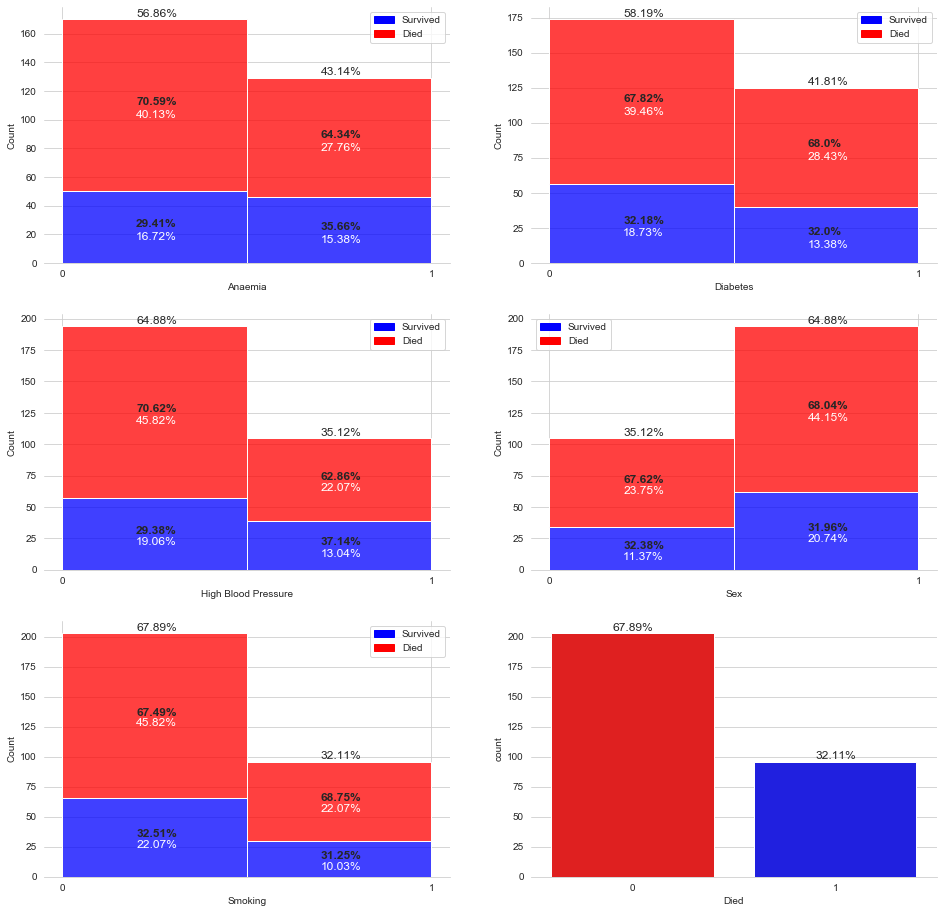

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16));

make_count_plot("anaemia", axes[0, 0], "Anaemia")
make_count_plot("diabetes", axes[0, 1], "Diabetes")
make_count_plot("high_blood_pressure", axes[1, 0], "High Blood Pressure")
make_count_plot("sex", axes[1, 1], "Sex")
make_count_plot("smoking", axes[2, 0], "Smoking")

sns.countplot(x="DEATH_EVENT", data=raw_data, palette={0: "red", 1: "blue"}, ax=axes[2, 1]);
axes[2, 1].text(-0.1, len(raw_data[raw_data["DEATH_EVENT"]==0])+2, str(round(len(raw_data[raw_data["DEATH_EVENT"]==0])*100/len(raw_data), 2))+"%", style='normal', fontsize=12)
axes[2, 1].text(0.9, len(raw_data[raw_data["DEATH_EVENT"]==1])+2, str(round(len(raw_data[raw_data["DEATH_EVENT"]==1])*100/len(raw_data), 2))+"%", style='normal', fontsize=12)
sns.despine(left=True, right=True, top=True, ax=axes[2, 1])
axes[2, 1].set_xlabel("Died")

Histograms of the Numerical Data

Text(0.5, 0, 'Serum Sodium')

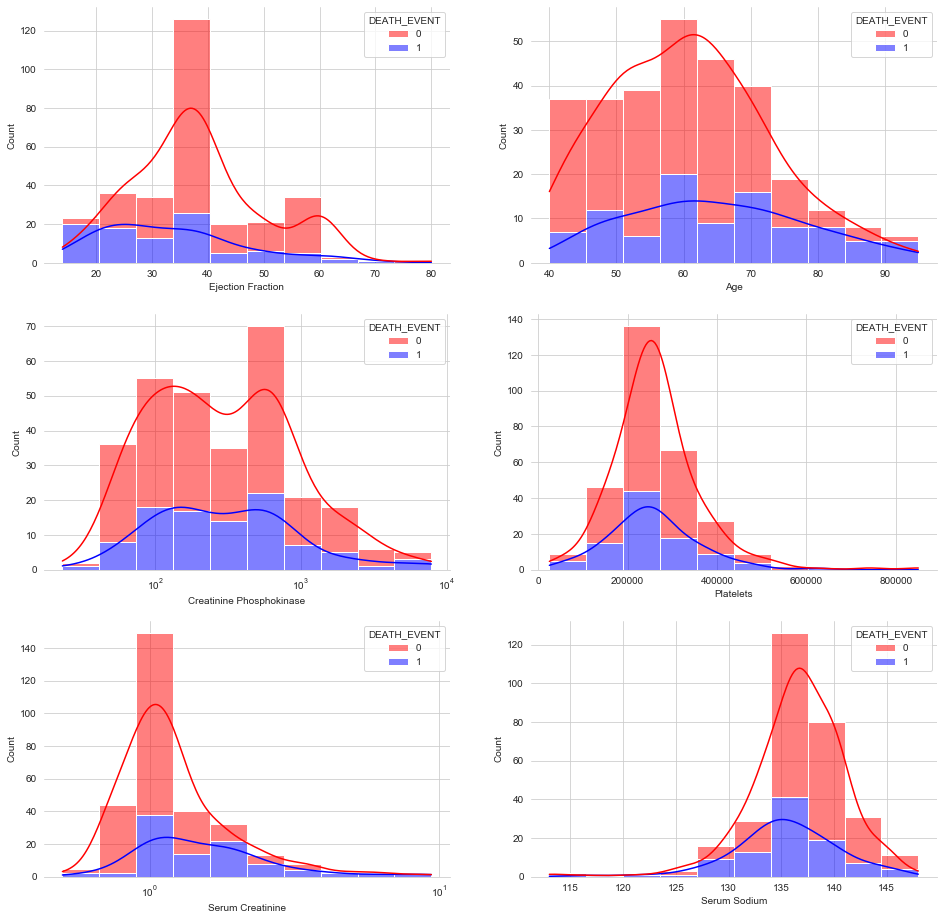

In [8]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 2, figsize=(16, 16))

sns.histplot(data=raw_data,x="ejection_fraction",ax=axes[0, 0],hue="DEATH_EVENT",multiple="stack",bins=10,kde=True,palette={0: "red", 1: "blue"})
sns.despine(left=True, right=True, top=True, ax=axes[0, 0])
axes[0, 0].set_xlabel("Ejection Fraction");
sns.histplot(data=raw_data,x="age",ax=axes[0, 1],hue="DEATH_EVENT",multiple="stack",bins=10,kde=True,palette={0: "red", 1: "blue"})
sns.despine(left=True, right=True, top=True, ax=axes[0, 1])
axes[0, 1].set_xlabel("Age");
sns.histplot(data=raw_data,x="creatinine_phosphokinase",ax=axes[1, 0],hue="DEATH_EVENT",multiple="stack",bins=10,kde=True,palette={0: "red", 1: "blue"}, log_scale=True)
sns.despine(left=True, right=True, top=True, ax=axes[1, 0])
axes[1, 0].set_xlabel("Creatinine Phosphokinase")
sns.histplot(data=raw_data,x="platelets",ax=axes[1, 1],hue="DEATH_EVENT",multiple="stack",bins=10,kde=True,palette={0: "red", 1: "blue"})
sns.despine(left=True, right=True, top=True, ax=axes[1, 1])
axes[1, 1].set_xlabel("Platelets")
sns.histplot(data=raw_data,x="serum_creatinine",ax=axes[2, 0],hue="DEATH_EVENT",multiple="stack",bins=10,kde=True,palette={0: "red", 1: "blue"}, log_scale=True)
sns.despine(left=True, right=True, top=True, ax=axes[2, 0])
axes[2, 0].set_xlabel("Serum Creatinine")
sns.histplot(data=raw_data,x="serum_sodium",ax=axes[2, 1],hue="DEATH_EVENT",multiple="stack",bins=10,kde=True,palette={0: "red", 1: "blue"})
sns.despine(left=True, right=True, top=True, ax=axes[2, 1])
axes[2, 1].set_xlabel("Serum Sodium")

In [10]:
engineered_data = raw_data.copy()

In [11]:
engineered_data["heart_function1_ratio"] = engineered_data["creatinine_phosphokinase"] * (engineered_data["ejection_fraction"]/100)
engineered_data["heart_function2_ratio"] = engineered_data["platelets"] * (engineered_data["ejection_fraction"]/100)
engineered_data["blood_function1_ratio"] = engineered_data["serum_sodium"] / engineered_data["creatinine_phosphokinase"]
engineered_data["general_healthiness"] = engineered_data["age"] * engineered_data["serum_creatinine"]
engineered_data["heart_healthiness"] = engineered_data["ejection_fraction"] / (engineered_data["general_healthiness"])
engineered_data["auto1"] = engineered_data["age"] / (engineered_data["ejection_fraction"]*engineered_data["serum_sodium"])
engineered_data["auto2"] = (engineered_data["age"]*engineered_data["serum_sodium"]) / engineered_data["ejection_fraction"]
engineered_data["auto3"] = (engineered_data["platelets"]*engineered_data["serum_creatinine"])/engineered_data["ejection_fraction"]

In [12]:
# Reordering the columns so that DEATH_EVENT is last
num_df = engineered_data.copy()
cols = num_df.columns.tolist()
cols = cols[:12] + cols[13:] + [cols[12]]
num_df = num_df[cols]

In [13]:
all_corrs = abs(num_df.corr())

In [14]:
death_corrs = dict(sorted(all_corrs["DEATH_EVENT"].drop("DEATH_EVENT").to_dict().items(), key=lambda x: x[1], reverse=True))
for feature in death_corrs.keys():
    print(feature+"'s correlation with 'DEATH_EVENT': "+str(death_corrs[feature]))

time's correlation with 'DEATH_EVENT': 0.5269637792775768
auto1's correlation with 'DEATH_EVENT': 0.44104981612505556
heart_healthiness's correlation with 'DEATH_EVENT': 0.4356055679558707
auto2's correlation with 'DEATH_EVENT': 0.42027897528186625
general_healthiness's correlation with 'DEATH_EVENT': 0.3278225439515316
auto3's correlation with 'DEATH_EVENT': 0.327420673674421
serum_creatinine's correlation with 'DEATH_EVENT': 0.2942775609841497
ejection_fraction's correlation with 'DEATH_EVENT': 0.26860331239406154
age's correlation with 'DEATH_EVENT': 0.25372854308800313
heart_function2_ratio's correlation with 'DEATH_EVENT': 0.19829969480063347
serum_sodium's correlation with 'DEATH_EVENT': 0.19520359641640145
high_blood_pressure's correlation with 'DEATH_EVENT': 0.0793510576912853
anaemia's correlation with 'DEATH_EVENT': 0.06627009846028772
creatinine_phosphokinase's correlation with 'DEATH_EVENT': 0.0627281602523747
platelets's correlation with 'DEATH_EVENT': 0.04913886798037422


In [15]:
all_engineered_corrs = abs(pd.concat([engineered_data.drop(raw_data.columns, axis=1), engineered_data["DEATH_EVENT"]], axis=1).corr())
all_raw_corrs = abs(raw_data.corr())

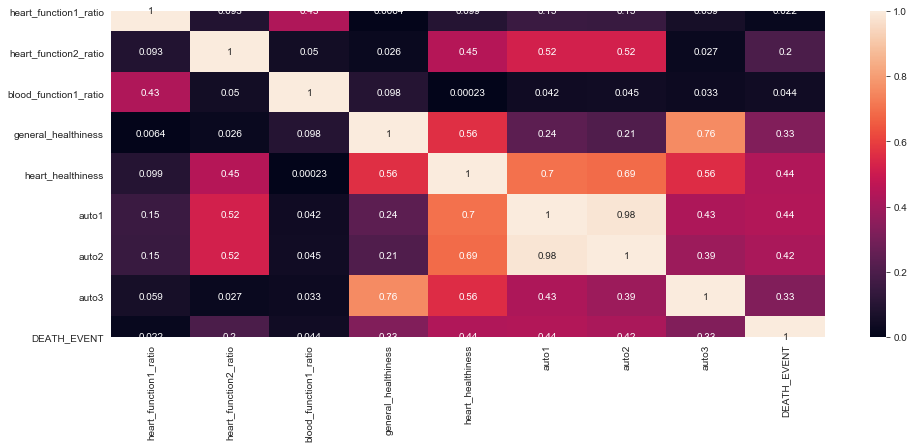

In [16]:
plt.figure(figsize=(16, 6))
sns.heatmap(all_engineered_corrs, linewidths=0, vmin=0, vmax=1, annot=True)

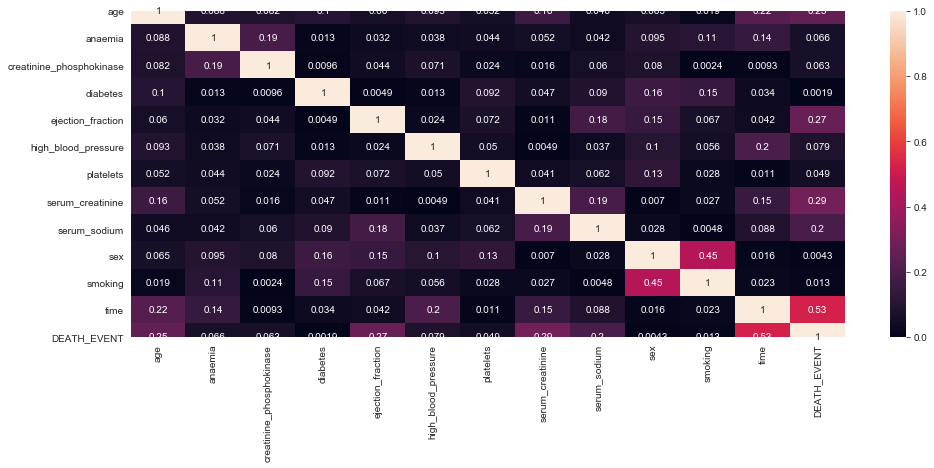

In [17]:
plt.figure(figsize=(16, 6))
sns.heatmap(all_raw_corrs, linewidths=0, vmin=0, vmax=1, annot=True)